# Lista 09
## Nome: Jorge Lucas Colares Martins
## Matricula: 402119

## Importando bibliotecas

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes as nb
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

## Importando dataframe

In [81]:
df = pd.read_csv("diabetes.csv",delimiter=',')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Questão 01 - Separando em treino e teste.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), df['Outcome'], test_size=0.2, random_state= 42, stratify=df['Outcome'])

## Questão 02 - Criando GridSearchs

In [83]:
np.logspace(-12, -1, 12)

array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05,
       1.e-04, 1.e-03, 1.e-02, 1.e-01])

In [84]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
nb = nb.GaussianNB()
svc = svm.SVC(random_state=42)

para_lr = {'penalty':['none','l1','l2','elasticnet'],'solver':['liblinear','saga'],'l1_ratio':np.arange(0.1,1,0.1),'C':1/np.logspace(-6, 6, 13)}
grid_lr = GridSearchCV(lr, param_grid=para_lr, cv=5, scoring='f1_weighted')

para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5, scoring='f1_weighted')

para_nb = {'var_smoothing':np.logspace(-12, -1, 12)}
grid_nb = GridSearchCV(nb, param_grid=para_nb, cv=5, scoring='f1_weighted')

para_svc = {'kernel':['rbf', 'sigmoid'],'cache_size':np.arange(10,300,10),'probability':[True, False],'shrinking':[True, False]}
grid_svc = GridSearchCV(svc, param_grid=para_svc, cv=5, scoring='f1_weighted')


## Treinando

In [85]:
grid_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'n_neighbors': 12}


In [86]:
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1000.0, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [87]:
grid_nb.fit(X_train, y_train)
print("Best parameters for Naive Bayes:", grid_nb.best_params_)

Best parameters for Naive Bayes: {'var_smoothing': 1e-05}


In [88]:
grid_svc.fit(X_train, y_train)
print("Best parameters for SVC:", grid_svc.best_params_)

Best parameters for SVC: {'cache_size': 10, 'kernel': 'rbf', 'probability': True, 'shrinking': True}


In [89]:
print('Best Score KNN',grid_knn.best_score_)
print('Best Score LR',grid_lr.best_score_)
print('Best Score NB',grid_nb.best_score_)
print('Best Score SVC',grid_svc.best_score_)

Best Score KNN 0.7606241388532532
Best Score LR 0.7708019909694194
Best Score NB 0.7664880091942752
Best Score SVC 0.7444348959436458


## Questão 03 - Treinando novo modelo com o melhor resultado

In [90]:
best = LogisticRegression(C=1000.0, l1_ratio=0.1, penalty='l2', solver='liblinear',random_state=42)
best.fit(X_train,y_train)

LogisticRegression(C=1000.0, l1_ratio=0.1, random_state=42, solver='liblinear')

## Questão 04 - Avaliando usando métrica F1-Score

In [91]:
best_pred = best.predict(X_test)
best_f1_score = metrics.f1_score(y_test, best_pred)

print('F1-Score com o melhor modelo', best_f1_score)

F1-Score com o melhor modelo 0.5599999999999999


## Questão 05 - Desenhando as regiões de decisões

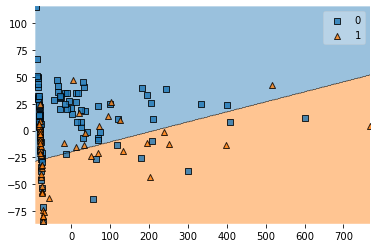

In [94]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(df.drop('Outcome',axis=1))

X_train, X_test, y_train, y_test = train_test_split(X_2D, df['Outcome'].values, test_size = 0.2, stratify=df['Outcome'].values, random_state=42)
best.fit(X_train, y_train)

plot_decision_regions(X_test, y_test, clf=best, legend=1)
plt.show()